In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sb.set()

In [117]:
raw_data = pd.read_csv('Real-life+example.csv')

In [118]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [119]:
new_data = raw_data.drop('Model', axis = 1)

In [120]:
new_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [121]:
new_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [122]:
data = new_data.dropna()

In [123]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [124]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

In [125]:
IQR = Q3 - Q1

In [126]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [127]:
upper_limit, lower_limit

(np.float64(44251.5), np.float64(-15352.5))

In [128]:
price_data = data[(data['Price'] >= lower_limit) & (data['Price'] <= upper_limit)]

In [129]:
price_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3670,3670.000000,3670,3670.000000,3670.000000,3670,3670,3670.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1459,NaN,NaN,1631,3299,NaN
mean,NaN,13338.795207,NaN,175.567575,2.697172,NaN,NaN,2005.639237
std,NaN,9581.344371,NaN,97.581022,5.151714,NaN,NaN,6.519617
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6650.000000,NaN,108.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10500.000000,NaN,168.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,17900.000000,NaN,238.000000,2.800000,NaN,NaN,2011.000000


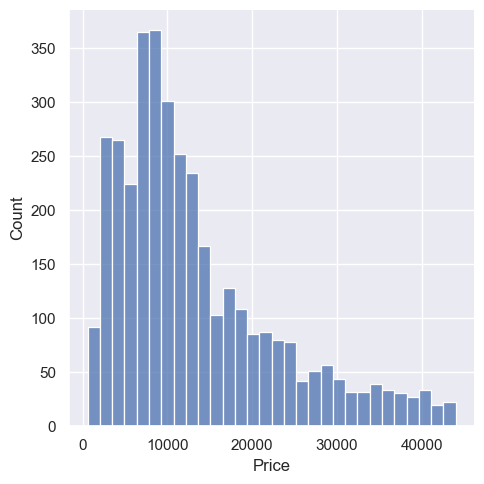

In [130]:
sb.displot(price_data['Price'])

In [131]:
Q1 = price_data['Mileage'].quantile(0.25)
Q3 = price_data['Mileage'].quantile(0.75)

In [132]:
IQR = Q3 - Q1

In [133]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [134]:
mileage_data = price_data[(price_data['Mileage'] >= lower_limit) & (price_data['Mileage'] <= upper_limit)]

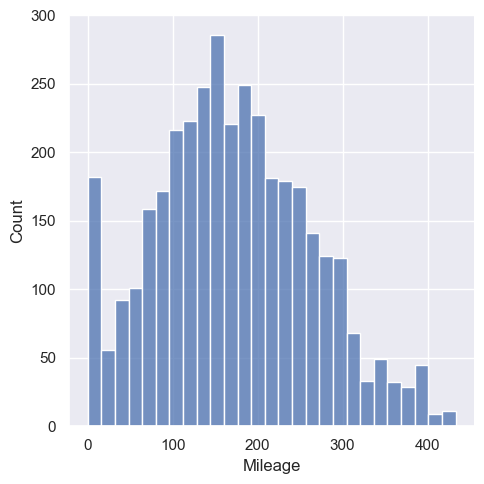

In [135]:
sb.displot(mileage_data['Mileage'])

In [136]:
engine_data = mileage_data[mileage_data['EngineV'] <= 6.5]

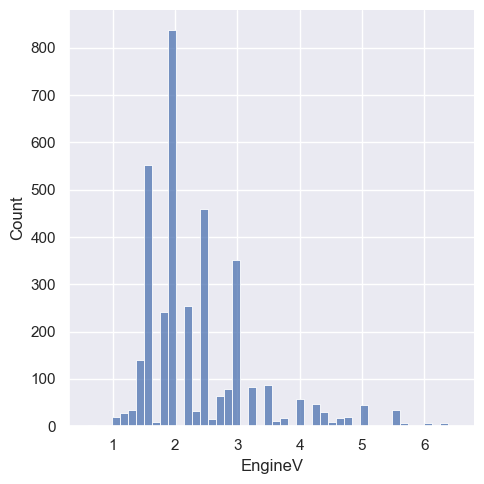

In [137]:
sb.displot(engine_data['EngineV'])

In [138]:
q = engine_data['Year'].quantile(0.01)
final_data = engine_data[engine_data['Year'] > q]

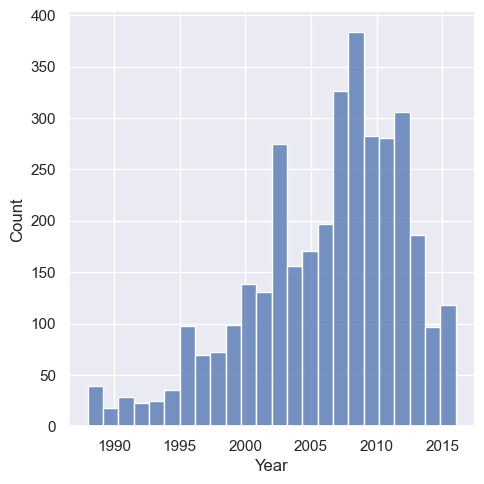

In [139]:
sb.displot(final_data['Year'])

In [140]:
final_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3555,3555.000000,3555,3555.000000,3555.000000,3555,3555,3555.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,821,NaN,1398,NaN,NaN,1586,3193,NaN
mean,NaN,13612.844602,NaN,171.263572,2.378141,NaN,NaN,2006.078481
std,NaN,9574.473211,NaN,91.237281,0.905036,NaN,NaN,5.921811
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,6900.000000,NaN,107.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10799.000000,NaN,165.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,18000.000000,NaN,232.500000,2.800000,NaN,NaN,2011.000000


In [141]:
data_clean = final_data.reset_index(drop = True)

In [142]:
data_clean.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3555,3555.000000,3555,3555.000000,3555.000000,3555,3555,3555.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,821,NaN,1398,NaN,NaN,1586,3193,NaN
mean,NaN,13612.844602,NaN,171.263572,2.378141,NaN,NaN,2006.078481
std,NaN,9574.473211,NaN,91.237281,0.905036,NaN,NaN,5.921811
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,6900.000000,NaN,107.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10799.000000,NaN,165.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,18000.000000,NaN,232.500000,2.800000,NaN,NaN,2011.000000


## Check OLS Assumptions

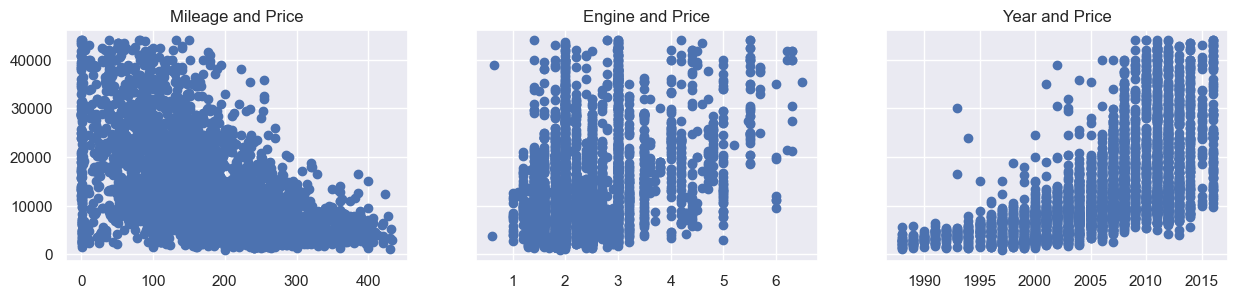

In [143]:
f, (x1,x2,x3) = plt.subplots(1, 3, sharey = True, figsize = (15 , 3))
x1.scatter(data_clean['Mileage'], data_clean['Price'])
x1.set_title('Mileage and Price')
x2.scatter(data_clean['EngineV'], data_clean['Price'])
x2.set_title('Engine and Price')
x3.scatter(data_clean['Year'], data_clean['Price'])
x3.set_title('Year and Price')
plt.show()

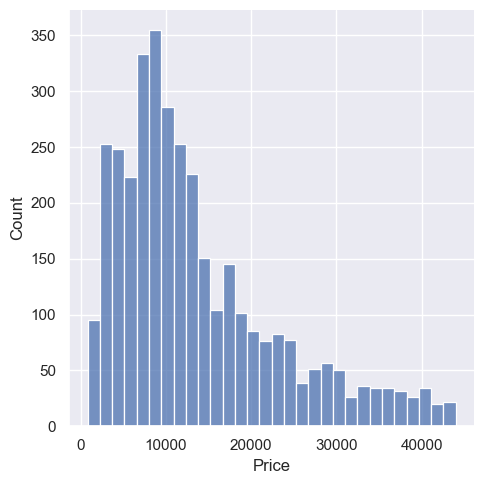

In [144]:
sb.displot(data_clean['Price'])

In [145]:
log_price = np.log(data_clean['Price'])

In [146]:
data_clean['log_price'] = log_price

In [147]:
data_clean = data_clean.drop('Price', axis = 1)

In [148]:
data_clean.describe(include = 'all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3555,3555,3555.000000,3555.000000,3555,3555,3555.000000,3555.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,821,1398,NaN,NaN,1586,3193,NaN,NaN
mean,NaN,NaN,171.263572,2.378141,NaN,NaN,2006.078481,9.266814
std,NaN,NaN,91.237281,0.905036,NaN,NaN,5.921811,0.742943
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,107.000000,1.800000,NaN,NaN,2002.000000,8.839277
50%,NaN,NaN,165.000000,2.000000,NaN,NaN,2007.000000,9.287209
75%,NaN,NaN,232.500000,2.800000,NaN,NaN,2011.000000,9.798127


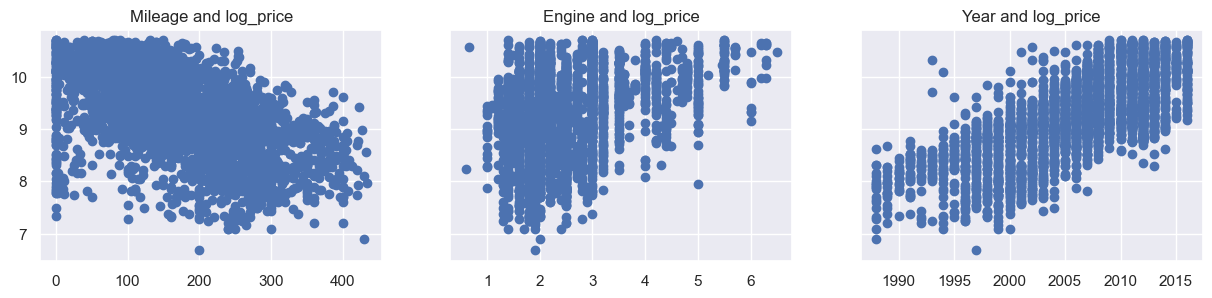

In [149]:
f, (x1,x2,x3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
x1.scatter(data_clean['Mileage'], data_clean['log_price'])
x1.set_title('Mileage and log_price')
x2.scatter(data_clean['EngineV'], data_clean['log_price'])
x2.set_title('Engine and log_price')
x3.scatter(data_clean['Year'], data_clean['log_price'])
x3.set_title('Year and log_price')
plt.show()

In [150]:
real_data = data_clean.drop(['Year'], axis = 1)

In [151]:
real_data.describe(include = 'all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3555,3555,3555.000000,3555.000000,3555,3555,3555.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,821,1398,NaN,NaN,1586,3193,NaN
mean,NaN,NaN,171.263572,2.378141,NaN,NaN,9.266814
std,NaN,NaN,91.237281,0.905036,NaN,NaN,0.742943
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,107.000000,1.800000,NaN,NaN,8.839277
50%,NaN,NaN,165.000000,2.000000,NaN,NaN,9.287209
75%,NaN,NaN,232.500000,2.800000,NaN,NaN,9.798127


## Create Dummy Vairables

In [152]:
data_dummies = pd.get_dummies(real_data, drop_first = True)

In [153]:
data_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [154]:
data_dummies.columns.values


array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [155]:
cols = [ 'log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [156]:
data_preprocessed = data_dummies[cols]

In [157]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear Regression Model

In [158]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### Scale Data

In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [160]:
inputs_scaled = scaler.transform(inputs)

In [161]:
inputs_scaled

array([[ 1.15907994, -0.41787706,  2.40237977, ..., -0.16389962,
         1.3090991 ,  0.33670908],
       [ 2.803376  ,  0.57669825, -0.41625392, ..., -0.16389962,
        -0.76388411,  0.33670908],
       [ 2.04699981,  2.89737397, -0.41625392, ..., -0.16389962,
        -0.76388411,  0.33670908],
       ...,
       [-1.4937177 , -0.85991053, -0.41625392, ..., -0.16389962,
         1.3090991 ,  0.33670908],
       [-1.86642481,  1.23974846,  2.40237977, ..., -0.16389962,
         1.3090991 ,  0.33670908],
       [-0.51810204, -0.41787706, -0.41625392, ..., -0.16389962,
        -0.76388411,  0.33670908]], shape=(3555, 17))

### Train Test Split

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 365)

In [163]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2844, 17), (2844,), (711, 17), (711,))

### Creating the Regression

In [164]:
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [165]:
reg_predict = reg.predict(x_train)

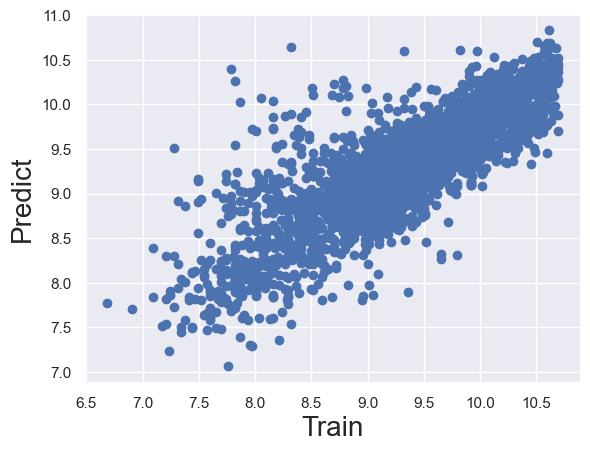

In [166]:
plt.scatter(y_train, reg_predict)
plt.xlabel('Train', fontsize = 20)
plt.ylabel('Predict', fontsize = 20)
plt.show()

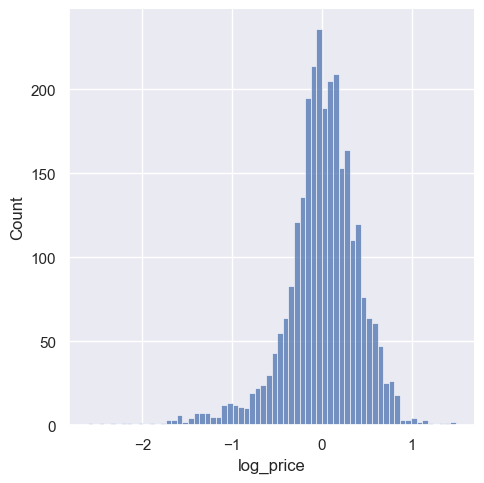

In [182]:
sb.displot(y_train - reg_predict)

### Finding the weights and bias

In [168]:
reg.score(x_train, y_train)

0.6797679337796982

In [169]:
reg.intercept_


np.float64(9.144207514109237)

In [170]:
reg.coef_

array([-0.0039548 ,  0.1976744 ,  0.03709298,  0.00576608, -0.42964411,
       -0.51494677, -0.09367245, -0.17228094, -0.51685752, -0.29392838,
       -0.39587194, -0.3964719 , -0.4387917 , -0.28501965, -0.16028121,
       -0.25429423,  1.05924514])

In [171]:
summary = pd.DataFrame(inputs.columns.values , columns = ['Features'])
summary ['Weights'] = reg.coef_

In [172]:
summary

,Features,Weights
0,Mileage,-0.003955
1,EngineV,0.197674
2,Brand_BMW,0.037093
3,Brand_Mercedes-Benz,0.005766
4,Brand_Mitsubishi,-0.429644
5,Brand_Renault,-0.514947
6,Brand_Toyota,-0.093672
7,Brand_Volkswagen,-0.172281
8,Body_hatch,-0.516858
9,Body_other,-0.293928


In [173]:
data_clean['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [174]:
y_hat_test = reg.predict(x_test)


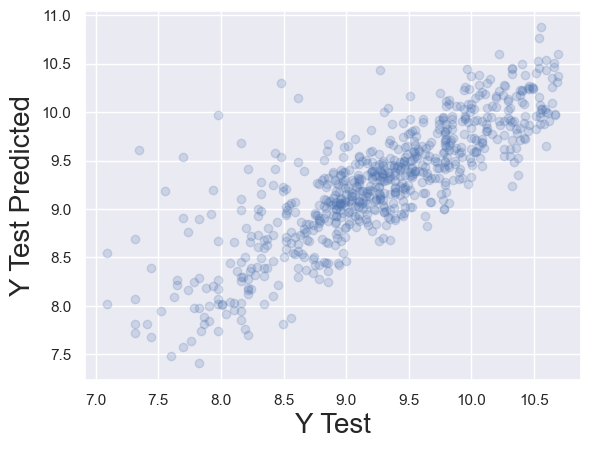

In [175]:
plt.scatter( y_test,y_hat_test , alpha = 0.2)
plt.xlabel('Y Test', fontsize = 20)
plt.ylabel('Y Test Predicted', fontsize = 20)
plt.show()

In [176]:
Y_test_prediction = pd.DataFrame(np.exp(y_hat_test).round(3), columns = ['Predictions'])

In [177]:
Y_test_prediction['Actual Values']= np.exp(y_test.reset_index(drop=True))

In [178]:
Y_test_prediction.head()

,Predictions,Actual Values
0,12634.659,10200.0
1,4410.040,4200.0
2,5151.395,7900.0
3,4912.434,4100.0
4,8124.515,9500.0


In [179]:
Y_test_prediction['Residuals'] = Y_test_prediction['Actual Values'] - Y_test_prediction['Predictions']
Y_test_prediction['Difference %'] = np.absolute(Y_test_prediction['Residuals']/ Y_test_prediction['Actual Values'] * 100)

In [180]:
Y_test_prediction.describe()

,Predictions,Actual Values,Residuals,Difference %
count,711.000000,711.000000,711.000000,711.000000
mean,12703.356819,13804.051561,1100.694743,35.677584
std,7595.316567,9819.007550,5845.843100,62.818405
min,1647.806000,1200.000000,-24794.887000,0.019573
25%,7625.209000,6900.000000,-1680.239500,10.689484
50%,11044.498000,10800.000000,150.587000,21.976549
75%,16091.282000,18250.000000,3154.626500,39.551147
max,52701.997000,44000.000000,24419.196000,860.995871


In [181]:
pd.options.display.max_rows = 999

Y_test_prediction = Y_test_prediction.sort_values(by = ['Difference %'])
Y_test_prediction

,Predictions,Actual Values,Residuals,Difference %
466,2998.413,2999.00,0.587,0.019573
600,9605.463,9600.00,-5.463,0.056906
234,4947.125,4950.00,2.875,0.058081
352,28870.510,28900.00,29.490,0.102042
704,7511.112,7500.00,-11.112,0.148160
502,8918.338,8900.00,-18.338,0.206045
570,10833.932,10800.00,-33.932,0.314185
585,7531.980,7500.00,-31.980,0.426400
236,15632.763,15700.00,67.237,0.428261
77,37325.343,37500.00,174.657,0.465752
